In [1]:
import numpy as np
Z = [1,2,3,5]
print(np.full((4,4), Z))



[[1 2 3 5]
 [1 2 3 5]
 [1 2 3 5]
 [1 2 3 5]]


[[-25.   -18.75 -12.5   -6.25   0.     6.25  12.5   18.75  25.  ]
 [-25.   -18.75 -12.5   -6.25   0.     6.25  12.5   18.75  25.  ]
 [-25.   -18.75 -12.5   -6.25   0.     6.25  12.5   18.75  25.  ]
 [-25.   -18.75 -12.5   -6.25   0.     6.25  12.5   18.75  25.  ]
 [-25.   -18.75 -12.5   -6.25   0.     6.25  12.5   18.75  25.  ]
 [-25.   -18.75 -12.5   -6.25   0.     6.25  12.5   18.75  25.  ]
 [-25.   -18.75 -12.5   -6.25   0.     6.25  12.5   18.75  25.  ]
 [-25.   -18.75 -12.5   -6.25   0.     6.25  12.5   20.75  25.  ]
 [-25.   -18.75 -12.5   -6.25   0.     6.25  12.5   18.75  25.  ]]
[[-25.   -25.   -25.   -25.   -25.   -25.   -25.   -25.   -25.  ]
 [-18.75 -18.75 -18.75 -18.75 -18.75 -18.75 -18.75 -18.75 -18.75]
 [-12.5  -12.5  -12.5  -12.5  -12.5  -12.5  -12.5  -12.5  -12.5 ]
 [ -6.25  -6.25  -6.25  -6.25  -6.25  -6.25  -6.25  -6.25  -6.25]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  6.25   6.25   6.25   6.25   6.25   6.25   6.25   6.25   6.25]
 [ 12.5  

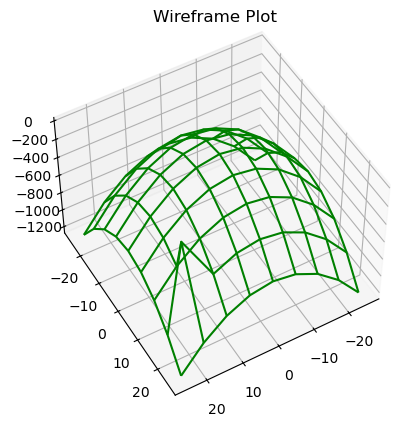

In [2]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Data for a three-dimensional line
#z = np.linspace(0, 15, 1000)
#x = np.sin(z)
#y = np.cos(z)
#ax.plot_wireframe(x, y, z, 'green')

def f(x, y):
    return - np.square(X) - np.square(Y)
    return np.sin(np.sqrt(x**2 + y**2))

x = np.linspace(-25, 25, 9)
y = np.linspace(-25, 25, 9)
X, Y = np.meshgrid(x, y)
X[7,7] += 2
Z = f(X, Y)
Z[7,7] = 10
print(X)
print(Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='green')
ax.set_title('Wireframe Plot')

ax.view_init(50, 60)
plt.show()

# 3D recon

In [3]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# focal length of camera
f = 200
# camera transverse distance
b = 100
# position of points in reference images
num_pts = 10
c = 128
X1 = [
    [404, 638, 852, 978, 1192, 1494, 1670, 1872],
    [395, 636, 847, 978, 1198, 1497, 1679, 1878],
    [394, 639, 849, 972, 1278, 1500, 1672, 1875],
    [398, 639, 842, 968, 1278, 1492, 1672, 1875],
    [402, 639, 842, 964, 1278, 1496, 1676, 1883]
]
X2 = [
    [700, 924, 1116, 1233, 1440, 1766, 1956, 2182],
    [700, 921, 1118, 1233, 1445, 1761, 1956, 2179],
    [703, 917, 1109, 1229, 1565, 1764, 1956, 2179],
    [698, 917, 1111, 1221, 1557, 1757, 1951, 2182],
    [698, 921, 1109, 1219, 1557, 1752, 1949, 2182]
]
Y = [
    [1711, 1729, 1752, 1773, 1790, 1752, 1742, 1717],
    [1978, 1990, 1992, 1998, 2004, 1992, 1987, 1981],
    [2247, 2241, 2229, 2223, 2262, 2235, 2238, 2250],
    [2516, 2490, 2467, 2449, 2484, 2464, 2481, 2508],
    [2645, 2613, 2578, 2563, 2619, 2581, 2607, 2643]
]
# convert to numpy arrays
x1 = np.array(X1)
x2 = np.array(X2)
y = np.array(Y)
# calculation of depth
Z = b * f / (x2 - x1)

# 3D Position Calculation
X = (x1 - c) * (Z / f)
Y = (y - c) * (Z / f)

In [6]:
np.shape(Z)

(5, 8)

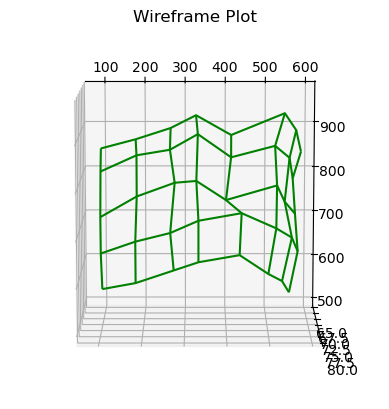

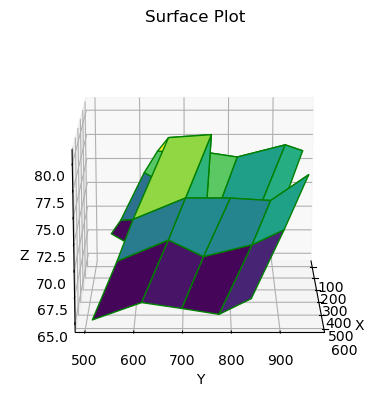

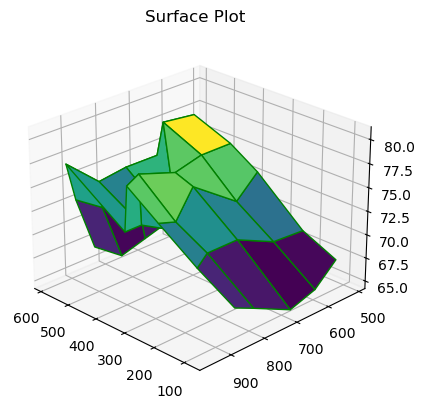

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='green')
ax.set_title('Wireframe Plot')

ax.view_init(100,-90,0)
plt.show()

####

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='green')
ax.set_title('Surface Plot')
ax.view_init(15, 0)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

####

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='green')
ax.set_title('Surface Plot')
ax.view_init(25, 135)
plt.show()

In [5]:
# Convert image's pixel size to its physical size in mm on the image plane:
# Millimeters = (number of pixels * 25.4) / DPI
# IPhone Camera Specs: 